In [ ]:
!chmod 600 ~/.passwd-s3fs

In [ ]:
!apt install s3fs

In [ ]:
!mkdir /content/s3
!s3fs um2ii-datasets /content/s3

In [ ]:
import pandas as pd
from fastai.vision.all import *
from sklearn.model_selection import train_test_split
import os
from glob import glob
from sklearn import metrics

MIMIC Age Validation on VinDr Dataset

In [ ]:
df = pd.read_csv('/content/vindr_age_split.csv')
df['Path'] = 'content/VinDr_Full/' + df['Path'].astype(str)

In [ ]:
mimic_age_model = load_learner('/content/mimic_age.pkl')
mimic_age_model.dls.to(device='cuda')
mimic_age_model.model.to(device='cuda')
age_test_dl = mimic_age_model.dls.test_dl(test_df, num_workers = 10)
age_preds = mimic_age_model.get_preds(dl=age_test_dl, with_decoded=True)

In [ ]:
predict_df = pd.DataFrame(test_df[['Path']])
predict_df['Age'] = test_df[['Patient Age Category']]
predict_df['Age_Tensor_Id'] =age_preds[2].numpy()
predict_df['Age_Probability'] =age_preds[0].numpy().tolist()

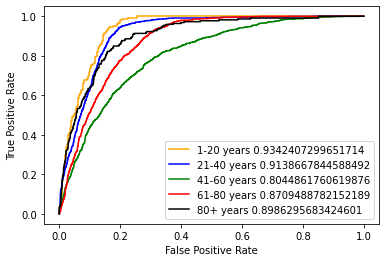

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_true = predict_df['Age'].astype(str),y_score = [prob[0] for prob in predict_df['Age_Probability']], pos_label = '0.0')
plt.plot(fpr,tpr, color='orange', label='1-20 years ' + str(metrics.auc(fpr, tpr)))
fpr, tpr, _ = metrics.roc_curve(y_true = predict_df['Age'].astype(str),y_score = [prob[1] for prob in predict_df['Age_Probability']], pos_label = '1.0')
plt.plot(fpr,tpr, color='blue', label='21-40 years ' + str(metrics.auc(fpr, tpr)))
fpr, tpr, _ = metrics.roc_curve(y_true = predict_df['Age'].astype(str),y_score = [prob[2] for prob in predict_df['Age_Probability']], pos_label = '2.0')
plt.plot(fpr,tpr, color='green', label='41-60 years ' + str(metrics.auc(fpr, tpr)))
fpr, tpr, _ = metrics.roc_curve(y_true = predict_df['Age'].astype(str),y_score = [prob[3] for prob in predict_df['Age_Probability']], pos_label = '3.0')
plt.plot(fpr,tpr, color='red', label='61-80 years ' + str(metrics.auc(fpr, tpr)))
fpr, tpr, _ = metrics.roc_curve(y_true = predict_df['Age'].astype(str),y_score = [prob[4] for prob in predict_df['Age_Probability']], pos_label = '4.0')
plt.plot(fpr,tpr, color='black', label='80+ years ' + str(metrics.auc(fpr, tpr)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
test_df.insert(len(test_df.columns), 'Age_Tensor_Id', age_preds[2].numpy())
test_df.insert(len(test_df.columns), 'Age_Probability', age_preds[0].numpy().tolist())
print(test_df)
test_df.to_csv('/content/sample_data/mimic_age_vindr_test.csv')

      index                                                     Path Gender  \
0         2  content/VinDr_Full/0005e8e3701dfb1dd93d53e2ff537b6e.jpg      F   
1         7  content/VinDr_Full/00150343289f317a0ad5629d5b7d9ef9.jpg      F   
2         9  content/VinDr_Full/001d127bad87592efe45a5c7678f8b8d.jpg      F   
3        10  content/VinDr_Full/0021df30f3fddef551eb3df4354b1d06.jpg      F   
4        11  content/VinDr_Full/00291f7aff0123ea76a59998effef229.jpg      F   
...     ...                                                      ...    ...   
4229  17990  content/VinDr_Full/ff425d16ade3f71bb7a6386f2f650cfa.jpg      M   
4230  17992  content/VinDr_Full/ff5b2414a7b94c78bb0073e656eb9c0e.jpg      M   
4231  17995  content/VinDr_Full/ff91fb82429a27521bbec8569b041f02.jpg      M   
4232  17998  content/VinDr_Full/ffc441e0c8b7153844047483a577e7c3.jpg      F   
4233  17999  content/VinDr_Full/ffccf1709d0081d122a1d1f9edbefdf1.jpg      M   

       Age  Patient Age Category split  Age_Tensor_

CheXpert Age Validation on VinDr Dataset

In [ ]:
df = pd.read_csv('/content/vindr_age_split.csv')
df['Path'] = 'VinDr_Full/' + df['Path'].astype(str)

In [ ]:
chexpert_age_model = load_learner('/content/chexpert_age.pkl')
chexpert_age_model.dls.to(device='cuda')
chexpert_age_model.model.to(device='cuda')
age_test_dl = chexpert_age_model.dls.test_dl(test_df)
age_preds = chexpert_age_model.get_preds(dl=age_test_dl, with_decoded=True)

In [ ]:
predict_df = pd.DataFrame(test_df[['Path']])
predict_df['Age'] = test_df[['Patient Age Category']]
predict_df['Age_Tensor_Id'] =age_preds[2].numpy()
predict_df['Age_Probability'] =age_preds[0].numpy().tolist()

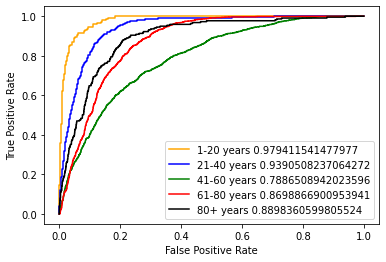

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_true = predict_df['Age'].astype(str),y_score = [prob[0] for prob in predict_df['Age_Probability']], pos_label = '0.0')
plt.plot(fpr,tpr, color='orange', label='1-20 years ' + str(metrics.auc(fpr, tpr)))
fpr, tpr, _ = metrics.roc_curve(y_true = predict_df['Age'].astype(str),y_score = [prob[1] for prob in predict_df['Age_Probability']], pos_label = '1.0')
plt.plot(fpr,tpr, color='blue', label='21-40 years ' + str(metrics.auc(fpr, tpr)))
fpr, tpr, _ = metrics.roc_curve(y_true = predict_df['Age'].astype(str),y_score = [prob[2] for prob in predict_df['Age_Probability']], pos_label = '2.0')
plt.plot(fpr,tpr, color='green', label='41-60 years ' + str(metrics.auc(fpr, tpr)))
fpr, tpr, _ = metrics.roc_curve(y_true = predict_df['Age'].astype(str),y_score = [prob[3] for prob in predict_df['Age_Probability']], pos_label = '3.0')
plt.plot(fpr,tpr, color='red', label='61-80 years ' + str(metrics.auc(fpr, tpr)))
fpr, tpr, _ = metrics.roc_curve(y_true = predict_df['Age'].astype(str),y_score = [prob[4] for prob in predict_df['Age_Probability']], pos_label = '4.0')
plt.plot(fpr,tpr, color='black', label='80+ years ' + str(metrics.auc(fpr, tpr)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
test_df.insert(len(test_df.columns), 'Age_Tensor_Id', age_preds[2].numpy())
test_df.insert(len(test_df.columns), 'Age_Probability', age_preds[0].numpy().tolist())
print(test_df)
test_df.to_csv('/content/sample_data/chexpert_age_vindr_test.csv')

      index  ...                                                                                                  Age_Probability
0         2  ...     [0.08986293524503708, 0.865323007106781, 0.04320184886455536, 0.0012487981002777815, 0.00036339813959784806]
1         7  ...      [0.0002299251063959673, 0.0054323324002325535, 0.09176239371299744, 0.7953392267227173, 0.1072361171245575]
2         9  ...     [0.009133903309702873, 0.6910872459411621, 0.2916756272315979, 0.007788300514221191, 0.00031480559846386313]
3        10  ...        [0.02418695017695427, 0.6028397679328918, 0.34923988580703735, 0.02222692035138607, 0.001506413915194571]
4        11  ...   [0.01743444986641407, 0.9569037556648254, 0.025108227506279945, 0.00039599568117409945, 0.0001576521317474544]
...     ...  ...                                                                                                              ...
4229  17990  ...  [0.34930798411369324, 0.6456366777420044, 0.004511213395744562, 0.000234

NIH Age Validation on VinDr Dataset

In [ ]:
df = pd.read_csv('/content/vindr_age_split.csv')
df['Path'] = 'content/VinDr_Full/' + df['Path'].astype(str)

In [ ]:
nih_age_model = load_learner('/content/nih_age.pkl')
nih_age_model.dls.to(device='cuda')
nih_age_model.model.to(device='cuda')
age_test_dl = nih_age_model.dls.test_dl(test_df, num_workers = 10)
age_preds = nih_age_model.get_preds(dl=age_test_dl, with_decoded=True)

In [ ]:
predict_df = pd.DataFrame(test_df[['Path']])
predict_df['Age'] = test_df[['Patient Age Category']]
predict_df['Age_Tensor_Id'] =age_preds[2].numpy()
predict_df['Age_Probability'] =age_preds[0].numpy().tolist()

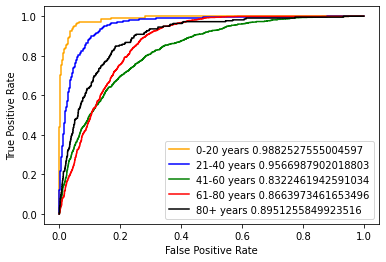

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_true = predict_df['Age'].astype(str),y_score = [prob[0] for prob in predict_df['Age_Probability']], pos_label = '0.0')
plt.plot(fpr,tpr, color='orange', label='0-20 years ' + str(metrics.auc(fpr, tpr)))
fpr, tpr, _ = metrics.roc_curve(y_true = predict_df['Age'].astype(str),y_score = [prob[1] for prob in predict_df['Age_Probability']], pos_label = '1.0')
plt.plot(fpr,tpr, color='blue', label='21-40 years ' + str(metrics.auc(fpr, tpr)))
fpr, tpr, _ = metrics.roc_curve(y_true = predict_df['Age'].astype(str),y_score = [prob[2] for prob in predict_df['Age_Probability']], pos_label = '2.0')
plt.plot(fpr,tpr, color='green', label='41-60 years ' + str(metrics.auc(fpr, tpr)))
fpr, tpr, _ = metrics.roc_curve(y_true = predict_df['Age'].astype(str),y_score = [prob[3] for prob in predict_df['Age_Probability']], pos_label = '3.0')
plt.plot(fpr,tpr, color='red', label='61-80 years ' + str(metrics.auc(fpr, tpr)))
fpr, tpr, _ = metrics.roc_curve(y_true = predict_df['Age'].astype(str),y_score = [prob[4] for prob in predict_df['Age_Probability']], pos_label = '4.0')
plt.plot(fpr,tpr, color='black', label='80+ years ' + str(metrics.auc(fpr, tpr)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
test_df.insert(len(test_df.columns), 'Age_Tensor_Id', age_preds[2].numpy())
test_df.insert(len(test_df.columns), 'Age_Probability', age_preds[0].numpy().tolist())
print(test_df)
test_df.to_csv('/content/sample_data/nih_age_vindr_test.csv')

      index  ...                                                                                                  Age_Probability
0         2  ...     [0.0035185322631150484, 0.440786749124527, 0.5509172677993774, 0.004757995717227459, 1.9431503460509703e-05]
1         7  ...    [0.00010402102634543553, 2.219454836449586e-05, 0.010117760859429836, 0.7433311343193054, 0.2464248090982437]
2         9  ...     [0.0018894539680331945, 0.14755427837371826, 0.8158745169639587, 0.03463363274931908, 4.814003477804363e-05]
3        10  ...       [0.01434839703142643, 0.16594350337982178, 0.7335730791091919, 0.08587900549173355, 0.0002559450804255903]
4        11  ...     [0.01412500161677599, 0.6940875053405762, 0.29000723361968994, 0.001750171184539795, 3.0108623832347803e-05]
...     ...  ...                                                                                                              ...
4229  17990  ...  [0.7938448786735535, 0.20209410786628723, 0.0036701008211821318, 0.00017